# Assignment 1 INFO 7374 Vignesh Murali NUID 001886775
## Building a Multilayer Perceptron To Classify Images On CIFAR-10 Dataset

### Abstract

The CIFAR-10 Dataset consists of 60,000 images belonging to 10 classes. We are attempting to build a feedforward neural network or multilayer perceptron to perform this task. 11 models are built and various parameters such as activation function, number of layers, neurons, learning rate and number of epochs are tweaked. Based on a result-driven approach, we subsequently attempt to build more efficient models. We finally identify a model which yields 0.559 accuracy and 1.29 loss which is relatively the best performance obtained among all my experiments.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical  
import numpy as np

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 82s 0us/step


Examining Dataset

In [0]:
print("Shape of training data")
print(X_train.shape)
print(y_train.shape)
print("Shape of testing data")
print(X_test.shape)
print(y_test.shape)

Shape of training data
(50000, 32, 32, 3)
(50000, 1)
Shape of testing data
(10000, 32, 32, 3)
(10000, 1)


Preparing dataset

In [0]:


# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255



## Base Model (Model 1)

Building the model

In [0]:
model = Sequential()
model.add(Dense(512,activation="relu",input_dim =3072))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

model.summary()


model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
import matplotlib.pyplot as plt
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
def plotAcc(history):  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [0]:
history = model.fit(X_train,y_train, epochs=10, batch_size=64, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 2.0060 - acc: 0.2727 - val_loss: 1.8554 - val_acc: 0.3417
Epoch 2/10
 - 3s - loss: 1.8272 - acc: 0.3517 - val_loss: 1.7687 - val_acc: 0.3776
Epoch 3/10
 - 3s - loss: 1.7511 - acc: 0.3780 - val_loss: 1.7364 - val_acc: 0.3814
Epoch 4/10
 - 3s - loss: 1.6993 - acc: 0.4001 - val_loss: 1.6858 - val_acc: 0.4070
Epoch 5/10
 - 3s - loss: 1.6627 - acc: 0.4126 - val_loss: 1.6438 - val_acc: 0.4207
Epoch 6/10
 - 3s - loss: 1.6282 - acc: 0.4274 - val_loss: 1.6076 - val_acc: 0.4349
Epoch 7/10
 - 3s - loss: 1.6018 - acc: 0.4354 - val_loss: 1.6246 - val_acc: 0.4208
Epoch 8/10
 - 3s - loss: 1.5769 - acc: 0.4430 - val_loss: 1.5748 - val_acc: 0.4416
Epoch 9/10
 - 3s - loss: 1.5551 - acc: 0.4515 - val_loss: 1.5667 - val_acc: 0.4471
Epoch 10/10
 - 3s - loss: 1.5393 - acc: 0.4561 - val_loss: 1.5345 - val_acc: 0.4596


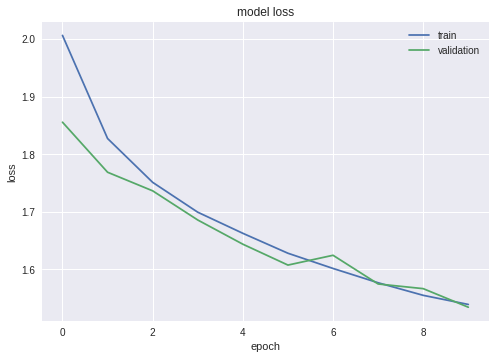

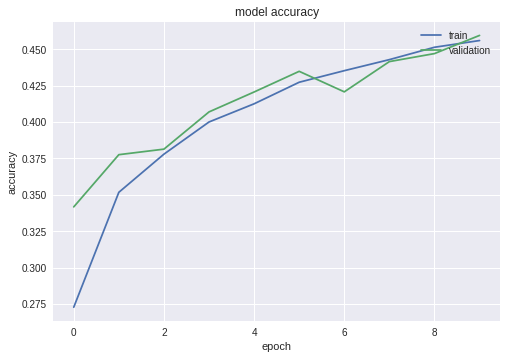

In [0]:
plotLosses(history)
plotAcc(history)

Evaluating with test set

In [0]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])



Test loss: 1.5027718137741088
Test accuracy: 0.4667


Observations:

- Our first model potentially underfits because of the small number of epochs.
- Training time was high because of small batch size.


## 1) Changing number of epochs

#### Increasing number of epochs (Model 10)
Let us experiment with the number of epochs
In the base model, I have used 10 epochs
In this model, I am increasing the number of epochs to 20

In [0]:
history_1 = model.fit(X_train,y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 7s 181us/step - loss: 1.9459 - acc: 0.2971 - val_loss: 1.8085 - val_acc: 0.3597
Epoch 2/20
40000/40000 [==============================] - 7s 176us/step - loss: 1.7721 - acc: 0.3695 - val_loss: 1.7043 - val_acc: 0.3994
Epoch 3/20
40000/40000 [==============================] - 7s 174us/step - loss: 1.6919 - acc: 0.3974 - val_loss: 1.6438 - val_acc: 0.4208
Epoch 4/20
40000/40000 [==============================] - 7s 176us/step - loss: 1.6453 - acc: 0.4194 - val_loss: 1.6055 - val_acc: 0.4398
Epoch 5/20
40000/40000 [==============================] - 7s 177us/step - loss: 1.6066 - acc: 0.4293 - val_loss: 1.5858 - val_acc: 0.4393
Epoch 6/20
40000/40000 [==============================] - 7s 176us/step - loss: 1.5702 - acc: 0.4458 - val_loss: 1.5603 - val_acc: 0.4502
Epoch 7/20
40000/40000 [==============================] - 7s 176us/step - loss: 1.5402 - acc: 0.4527 - val_loss: 1.5190 - 

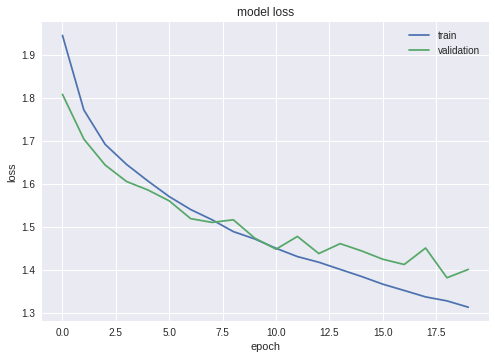

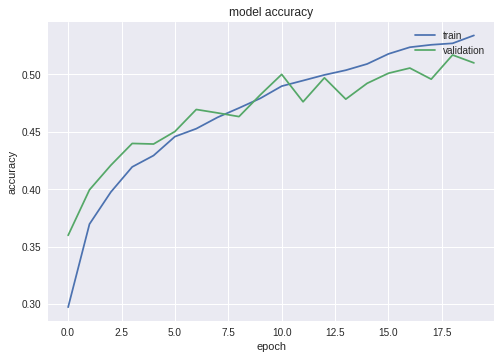

In [0]:
plotLosses(history_1)
plotAcc(history_1)

In [0]:
score10 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score10[0])
print('Test accuracy:', score10[1])

Test loss: 1.3840357213974
Test accuracy: 0.5099


Observations:
- Increasing epochs slightly overfits the model.
-  Test accuracy has increased by about 4 % and training accuracy by 8%, overall better performance than the base model.

#### Decreasing number of epochs (Model 11)

 In the base model, I have used 10 epochs In this model, I am decreasing number of epochs to 4


In [0]:
history_2 = model.fit(X_train,y_train, epochs=4, batch_size=32, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 7s 183us/step - loss: 1.9461 - acc: 0.2994 - val_loss: 1.7757 - val_acc: 0.3740
Epoch 2/4
40000/40000 [==============================] - 7s 179us/step - loss: 1.7669 - acc: 0.3714 - val_loss: 1.7070 - val_acc: 0.3987
Epoch 3/4
40000/40000 [==============================] - 7s 177us/step - loss: 1.6946 - acc: 0.3979 - val_loss: 1.6425 - val_acc: 0.4211
Epoch 4/4
40000/40000 [==============================] - 7s 178us/step - loss: 1.6413 - acc: 0.4181 - val_loss: 1.6311 - val_acc: 0.4294


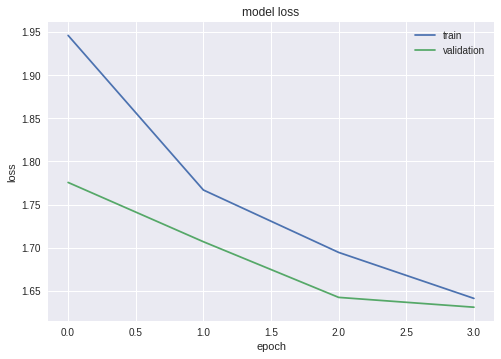

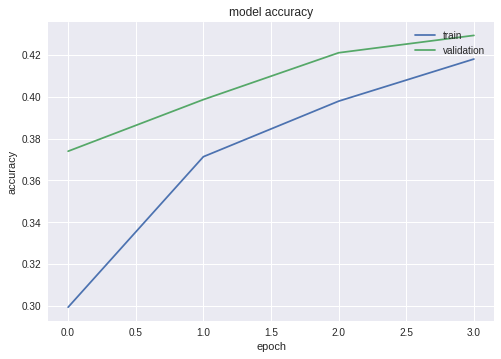

In [0]:
plotLosses(history_2)
plotAcc(history_2)

In [0]:
score11 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])

Test loss: 1.6019637374877929
Test accuracy: 0.4337


Observations:
- Model underfits.
- Model performs very poorly as there aren't enough epochs to train it.



## 2) Adjusting Batch Size (Model 2)
- In our initial model, we had set batch size to 64, let us try experimenting with this parameter.
- We shall set batch size to 128.
- Since we are using a larger batch size, computation time will decrease dramatically per epoch. Hence, we can try using a larger number of epochs and measure our results.

In [0]:
history_3 = model.fit(X_train,y_train, epochs=30, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 2.0630 - acc: 0.2479 - val_loss: 1.9079 - val_acc: 0.3239
Epoch 2/30
 - 2s - loss: 1.8895 - acc: 0.3259 - val_loss: 1.8246 - val_acc: 0.3555
Epoch 3/30
 - 2s - loss: 1.8190 - acc: 0.3557 - val_loss: 1.7802 - val_acc: 0.3726
Epoch 4/30
 - 2s - loss: 1.7688 - acc: 0.3751 - val_loss: 1.7366 - val_acc: 0.3903
Epoch 5/30
 - 2s - loss: 1.7307 - acc: 0.3900 - val_loss: 1.7156 - val_acc: 0.3980
Epoch 6/30
 - 2s - loss: 1.6993 - acc: 0.4001 - val_loss: 1.6840 - val_acc: 0.4125
Epoch 7/30
 - 2s - loss: 1.6725 - acc: 0.4086 - val_loss: 1.6644 - val_acc: 0.4155
Epoch 8/30
 - 2s - loss: 1.6497 - acc: 0.4177 - val_loss: 1.6428 - val_acc: 0.4253
Epoch 9/30
 - 2s - loss: 1.6312 - acc: 0.4253 - val_loss: 1.6212 - val_acc: 0.4316
Epoch 10/30
 - 2s - loss: 1.6110 - acc: 0.4302 - val_loss: 1.6095 - val_acc: 0.4313
Epoch 11/30
 - 2s - loss: 1.5959 - acc: 0.4366 - val_loss: 1.6039 - val_acc: 0.4323
Epoch 12/30
 - 2s - loss: 1.5798 - 

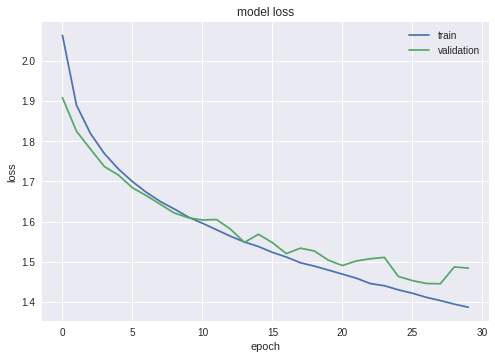

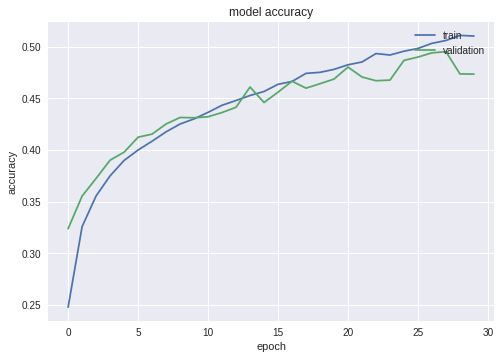

In [0]:
plotLosses(history_3)
plotAcc(history_3)

In [0]:
score2 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 1.4635271297454835
Test accuracy: 0.4771


Observations:

- Computation was a lot faster because we increased batch size.

- The model slightly overfits after the 20th epoch.

## 3) Network Architecture

### Adding more neurons in a layer (Model 3)

In our previous experiments, the hidden layers contained 512 neurons each. 
We will double the number of neurons in each layer and observe the results.

In [0]:
model2 = Sequential()
model2.add(Dense(1024,activation="relu",input_dim =3072))
model2.add(Dropout(0.2))
model2.add(Dense(1024,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation="softmax"))

model2.summary()


model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_4 = model2.fit(X_train,y_train, epochs=30, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 3s - loss: 2.0340 - acc: 0.2642 - val_loss: 1.8767 - val_acc: 0.3405
Epoch 2/30
 - 2s - loss: 1.8558 - acc: 0.3433 - val_loss: 1.7972 - val_acc: 0.3692
Epoch 3/30
 - 2s - loss: 1.7878 - acc: 0.3682 - val_loss: 1.7603 - val_acc: 0.3827
Epoch 4/30
 - 2s - loss: 1.7403 - acc: 0.3878 - val_loss: 1.7289 - val_acc: 0.3930
Epoch 5/30
 - 2s - loss: 1.6997 - acc: 0.4013 - val_loss: 1.6851 - val_acc: 0.4078
Epoch 6/30
 - 2s - loss: 1.6698 - acc: 0.4094 - val_loss: 1.6612 - val_acc: 0.4205
Epoch 7/30
 - 2s - loss: 1.6418 - acc: 0.4240 - val_loss: 1.6328 - val_acc: 0.4286
Epoch 8/30
 - 2s - loss: 1.6200 - acc: 0.4316 - val_loss: 1.6192 - val_acc: 0.4323
Epoch 9/30
 - 2s - loss: 1.5994 - acc: 0.4387 - val_loss: 1.6295 - val_acc: 0.4309
Epoch 10/30
 - 2s - loss: 1.5799 - acc: 0.4463 - val_loss: 1.5940 - val_acc: 0.4389
Epoch 11/30
 - 2s - loss: 1.5619 - acc: 0.4516 - val_loss: 1.5658 - val_acc: 0.4500
Epoch 12/30
 - 2s - loss: 1.5482 - 

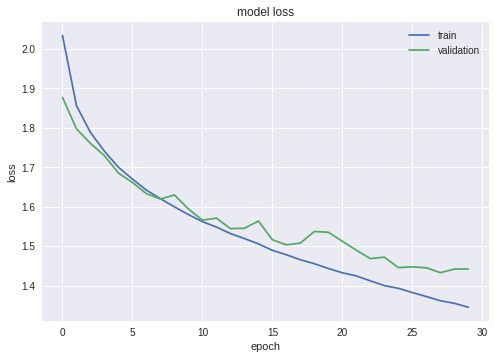

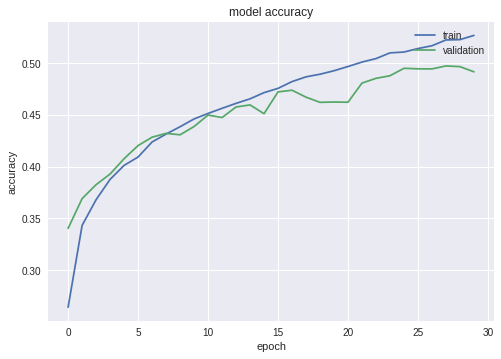

In [0]:
plotLosses(history_4)
plotAcc(history_4)

In [0]:
score3 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 1.4153058595657348
Test accuracy: 0.4963


Observations:
- Slight increase in accuracy.
- Overfits sooner than previous experiments.

### Adding more layers to the network (Model 4)
I am adding an extra hidden layer to the model with 512 neurons and relu activation.

In [0]:
model3 = Sequential()
model3.add(Dense(1024,activation="relu",input_dim =3072))
model3.add(Dropout(0.2))
model3.add(Dense(1024,activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(512,activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation="softmax"))

model3.summary()


model3.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total para

In [0]:
history_5 = model3.fit(X_train,y_train, epochs=50, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 3s - loss: 2.0902 - acc: 0.2328 - val_loss: 1.9316 - val_acc: 0.3161
Epoch 2/50
 - 3s - loss: 1.9024 - acc: 0.3206 - val_loss: 1.8220 - val_acc: 0.3638
Epoch 3/50
 - 3s - loss: 1.8292 - acc: 0.3481 - val_loss: 1.7765 - val_acc: 0.3708
Epoch 4/50
 - 3s - loss: 1.7773 - acc: 0.3679 - val_loss: 1.7460 - val_acc: 0.3798
Epoch 5/50
 - 2s - loss: 1.7313 - acc: 0.3830 - val_loss: 1.7081 - val_acc: 0.3949
Epoch 6/50
 - 3s - loss: 1.7031 - acc: 0.3938 - val_loss: 1.6730 - val_acc: 0.4076
Epoch 7/50
 - 3s - loss: 1.6685 - acc: 0.4098 - val_loss: 1.6528 - val_acc: 0.4155
Epoch 8/50
 - 3s - loss: 1.6448 - acc: 0.4159 - val_loss: 1.6329 - val_acc: 0.4243
Epoch 9/50
 - 3s - loss: 1.6243 - acc: 0.4232 - val_loss: 1.5992 - val_acc: 0.4362
Epoch 10/50
 - 3s - loss: 1.6041 - acc: 0.4304 - val_loss: 1.5831 - val_acc: 0.4400
Epoch 11/50
 - 2s - loss: 1.5789 - acc: 0.4401 - val_loss: 1.5668 - val_acc: 0.4459
Epoch 12/50
 - 3s - loss: 1.5655 - 

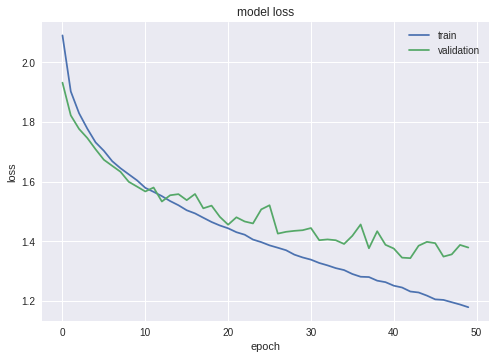

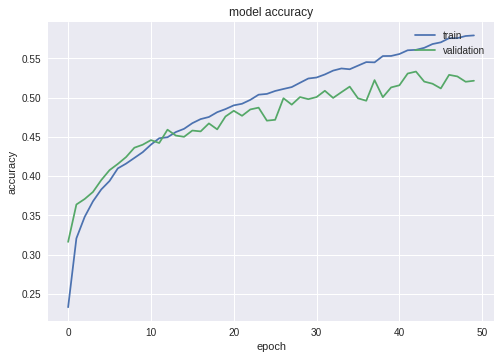

In [0]:
plotLosses(history_5)
plotAcc(history_5)

In [0]:
score4 = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 1.3528676864624023
Test accuracy: 0.5189


Observation:
- Lower loss, higher accuracy.
- It is clear that on this dataset adding an extra hidden layer has been beneficial.

## 4) Change Learning Rate ( Model 5)

We will reduce our learning rate from the default value to 0.001.

In [0]:
model4 = Sequential()
model4.add(Dense(1024,activation="relu",input_dim =3072))
model4.add(Dropout(0.2))
model4.add(Dense(1024,activation="relu"))
model4.add(Dropout(0.2))
model4.add(Dense(512,activation="relu"))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation="softmax"))

model4.summary()

sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total para

In [0]:
history_6 = model4.fit(X_train,y_train, epochs=75, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/75
 - 3s - loss: 2.0983 - acc: 0.2324 - val_loss: 1.9098 - val_acc: 0.3219
Epoch 2/75
 - 3s - loss: 1.9003 - acc: 0.3198 - val_loss: 1.8210 - val_acc: 0.3534
Epoch 3/75
 - 3s - loss: 1.8211 - acc: 0.3552 - val_loss: 1.7603 - val_acc: 0.3776
Epoch 4/75
 - 3s - loss: 1.7662 - acc: 0.3721 - val_loss: 1.7157 - val_acc: 0.3913
Epoch 5/75
 - 3s - loss: 1.7240 - acc: 0.3850 - val_loss: 1.6781 - val_acc: 0.4117
Epoch 6/75
 - 3s - loss: 1.6868 - acc: 0.4033 - val_loss: 1.6540 - val_acc: 0.4172
Epoch 7/75
 - 3s - loss: 1.6571 - acc: 0.4123 - val_loss: 1.6288 - val_acc: 0.4251
Epoch 8/75
 - 3s - loss: 1.6311 - acc: 0.4229 - val_loss: 1.6077 - val_acc: 0.4334
Epoch 9/75
 - 3s - loss: 1.6065 - acc: 0.4282 - val_loss: 1.5832 - val_acc: 0.4456
Epoch 10/75
 - 3s - loss: 1.5853 - acc: 0.4372 - val_loss: 1.5667 - val_acc: 0.4496
Epoch 11/75
 - 3s - loss: 1.5649 - acc: 0.4471 - val_loss: 1.5446 - val_acc: 0.4644
Epoch 12/75
 - 3s - loss: 1.5479 - 

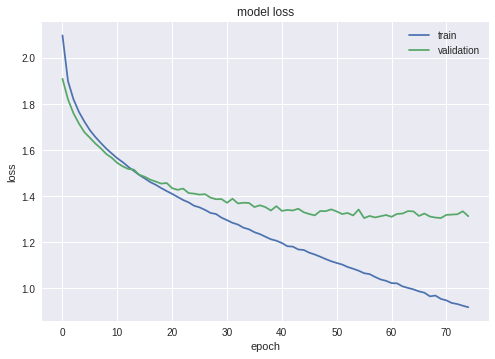

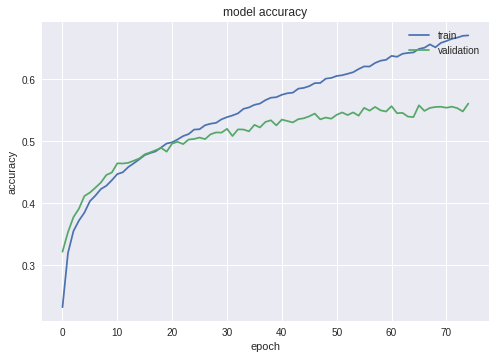

In [0]:
plotLosses(history_6)
plotAcc(history_6)

In [0]:
score5 = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 1.2958567558288574
Test accuracy: 0.559


Observations:
- Model overfits after the 20th - 25th epoch, yet performs relatively well.
- Reducing the learning rate has yielded a lower loss and high accuracy. Thereby, improving performance.
- Further lowering learning rate makes the model perform worse so we will stick with this learning rate for future experiments.

### Let us try using a different optimization technique. (Model 6)

'Adam' is generally known to be a fast and effective optimizer for multi-class classification problems like this.

In [0]:
model5 = Sequential()
model5.add(Dense(1024,activation="relu",input_dim =3072))
model5.add(Dropout(0.2))
model5.add(Dense(1024,activation="relu"))
model5.add(Dropout(0.2))
model5.add(Dense(512,activation="relu"))
model5.add(Dropout(0.2))
model5.add(Dense(10,activation="softmax"))

model5.summary()

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model5.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total para

In [0]:
history_7 = model5.fit(X_train,y_train, epochs=50, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 1.9822 - acc: 0.2727 - val_loss: 1.8815 - val_acc: 0.3151
Epoch 2/50
 - 4s - loss: 1.8272 - acc: 0.3340 - val_loss: 1.7661 - val_acc: 0.3699
Epoch 3/50
 - 4s - loss: 1.7704 - acc: 0.3594 - val_loss: 1.7446 - val_acc: 0.3769
Epoch 4/50
 - 4s - loss: 1.7402 - acc: 0.3726 - val_loss: 1.7467 - val_acc: 0.3647
Epoch 5/50
 - 4s - loss: 1.7072 - acc: 0.3814 - val_loss: 1.6613 - val_acc: 0.4011
Epoch 6/50
 - 4s - loss: 1.6769 - acc: 0.3967 - val_loss: 1.6417 - val_acc: 0.4108
Epoch 7/50
 - 4s - loss: 1.6579 - acc: 0.3980 - val_loss: 1.6056 - val_acc: 0.4247
Epoch 8/50
 - 4s - loss: 1.6494 - acc: 0.4044 - val_loss: 1.6248 - val_acc: 0.4199
Epoch 9/50
 - 4s - loss: 1.6332 - acc: 0.4086 - val_loss: 1.5858 - val_acc: 0.4315
Epoch 10/50
 - 4s - loss: 1.6152 - acc: 0.4143 - val_loss: 1.5848 - val_acc: 0.4404
Epoch 11/50
 - 4s - loss: 1.6029 - acc: 0.4200 - val_loss: 1.5751 - val_acc: 0.4450
Epoch 12/50
 - 4s - loss: 1.5887 - 

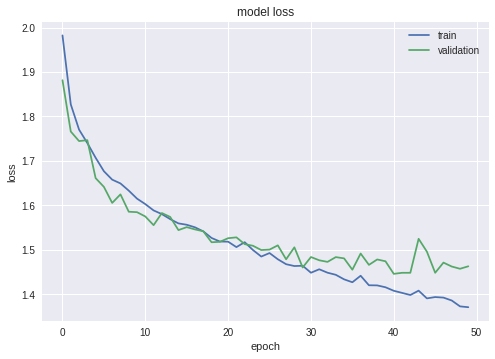

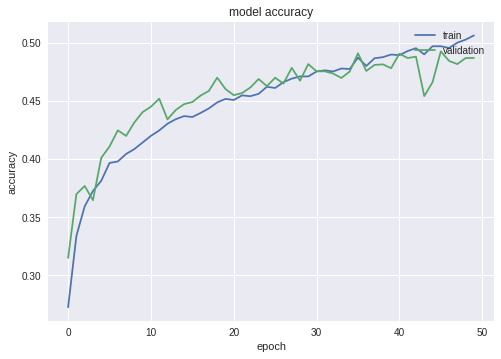

In [0]:
plotLosses(history_7)
plotAcc(history_7)

In [0]:
score6 = model5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Test loss: 1.4385784116744995
Test accuracy: 0.4918


Observations:
- Overfits after the 40th epoch.
- Since SGD yielded better results than Adam, we will continue with SGD.

## 5) Change Activation Functions (Model 7)

We shall try changing the hidden layer activations to 'tanh' instead of 'relu'.

In [0]:
model6 = Sequential()
model6.add(Dense(1024,activation="tanh",input_dim =3072))
model6.add(Dropout(0.2))
model6.add(Dense(1024,activation="tanh"))
model6.add(Dropout(0.2))
model6.add(Dense(512,activation="tanh"))
model6.add(Dropout(0.2))
model6.add(Dense(10,activation="softmax"))

model6.summary()

sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model6.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_21 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total para

In [0]:
history_8 = model6.fit(X_train,y_train, epochs=75, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/75
 - 4s - loss: 2.0362 - acc: 0.2654 - val_loss: 1.8504 - val_acc: 0.3358
Epoch 2/75
 - 3s - loss: 1.8594 - acc: 0.3365 - val_loss: 1.7958 - val_acc: 0.3709
Epoch 3/75
 - 3s - loss: 1.8114 - acc: 0.3590 - val_loss: 1.7554 - val_acc: 0.3882
Epoch 4/75
 - 3s - loss: 1.7833 - acc: 0.3738 - val_loss: 1.7432 - val_acc: 0.3902
Epoch 5/75
 - 3s - loss: 1.7634 - acc: 0.3790 - val_loss: 1.7200 - val_acc: 0.4016
Epoch 6/75
 - 3s - loss: 1.7437 - acc: 0.3858 - val_loss: 1.7179 - val_acc: 0.4029
Epoch 7/75
 - 3s - loss: 1.7244 - acc: 0.3932 - val_loss: 1.7171 - val_acc: 0.4041
Epoch 8/75
 - 3s - loss: 1.7102 - acc: 0.3971 - val_loss: 1.7017 - val_acc: 0.4133
Epoch 9/75
 - 3s - loss: 1.6963 - acc: 0.4037 - val_loss: 1.6701 - val_acc: 0.4209
Epoch 10/75
 - 3s - loss: 1.6850 - acc: 0.4084 - val_loss: 1.6678 - val_acc: 0.4198
Epoch 11/75
 - 3s - loss: 1.6728 - acc: 0.4137 - val_loss: 1.6467 - val_acc: 0.4293
Epoch 12/75
 - 3s - loss: 1.6590 - 

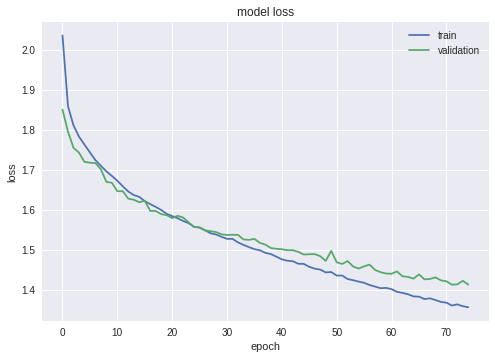

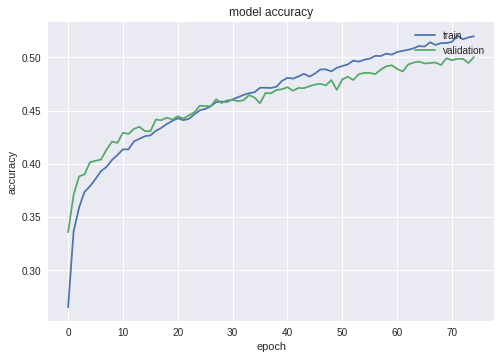

In [0]:
plotLosses(history_8)
plotAcc(history_8)

In [0]:
score7 = model6.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Test loss: 1.388169965171814
Test accuracy: 0.5083


Observations:
- The model overfits after the 45th epoch.
- The model performed better with relu activations.

## 6) Change dropout rates (Model 8)
We have used 0.2 and 0.3 dropout rates for our models thus far.
Let us use 0.5 drop out rate and observe the performance.

In [0]:
model7 = Sequential()
model7.add(Dense(1024,activation="relu",input_dim =3072))
model7.add(Dropout(0.5))
model7.add(Dense(1024,activation="relu"))
model7.add(Dropout(0.5))
model7.add(Dense(512,activation="relu"))
model7.add(Dropout(0.5))
model7.add(Dense(512,activation="relu"))
model7.add(Dropout(0.5))
model7.add(Dense(10,activation="softmax"))

model7.summary()

sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model7.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
__________

In [0]:
history_9 = model7.fit(X_train,y_train, epochs=120, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/120
 - 4s - loss: 2.3272 - acc: 0.1222 - val_loss: 2.2185 - val_acc: 0.2416
Epoch 2/120
 - 3s - loss: 2.2129 - acc: 0.1633 - val_loss: 2.0952 - val_acc: 0.2472
Epoch 3/120
 - 3s - loss: 2.1199 - acc: 0.1963 - val_loss: 2.0238 - val_acc: 0.2665
Epoch 4/120
 - 3s - loss: 2.0651 - acc: 0.2169 - val_loss: 1.9674 - val_acc: 0.3009
Epoch 5/120
 - 3s - loss: 2.0204 - acc: 0.2392 - val_loss: 1.9287 - val_acc: 0.3100
Epoch 6/120
 - 3s - loss: 1.9822 - acc: 0.2570 - val_loss: 1.9002 - val_acc: 0.3203
Epoch 7/120
 - 3s - loss: 1.9520 - acc: 0.2727 - val_loss: 1.8726 - val_acc: 0.3294
Epoch 8/120
 - 3s - loss: 1.9276 - acc: 0.2850 - val_loss: 1.8479 - val_acc: 0.3338
Epoch 9/120
 - 3s - loss: 1.9026 - acc: 0.2963 - val_loss: 1.8231 - val_acc: 0.3411
Epoch 10/120
 - 3s - loss: 1.8868 - acc: 0.3038 - val_loss: 1.8131 - val_acc: 0.3411
Epoch 11/120
 - 3s - loss: 1.8661 - acc: 0.3123 - val_loss: 1.7879 - val_acc: 0.3528
Epoch 12/120
 - 3s - los

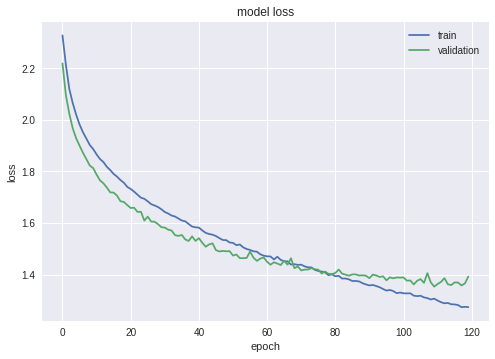

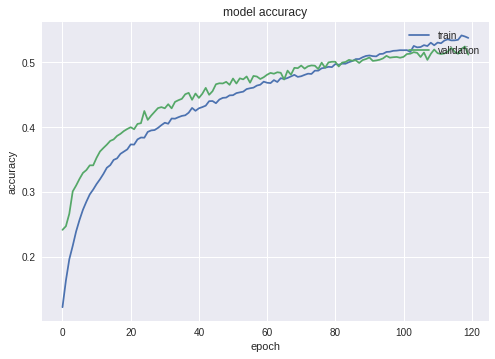

In [0]:
plotLosses(history_9)
plotAcc(history_9)

In [0]:
score8 = model7.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Test loss: 1.381894599723816
Test accuracy: 0.5084


Observations:
- Slightly overfits after the 100th epoch.
- Good performance, low loss.

### Model 9

Based on the results of my experiments, I will try to create a model which can potentially give us optimal results.

In [0]:
model8 = Sequential()
model8.add(Dense(1024,activation="relu",input_dim =3072))
model8.add(Dropout(0.2))
model8.add(Dense(512,activation="relu"))
model8.add(Dropout(0.2))
model8.add(Dense(512,activation="relu"))
model8.add(Dropout(0.2))
model8.add(Dense(10,activation="softmax"))

model8.summary()

sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model8.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                5130      
Total para

In [0]:
history_10 = model8.fit(X_train,y_train, epochs=40, batch_size=128, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
 - 3s - loss: 2.1127 - acc: 0.2205 - val_loss: 1.9283 - val_acc: 0.3147
Epoch 2/40
 - 3s - loss: 1.9171 - acc: 0.3075 - val_loss: 1.8416 - val_acc: 0.3457
Epoch 3/40
 - 3s - loss: 1.8410 - acc: 0.3418 - val_loss: 1.7835 - val_acc: 0.3694
Epoch 4/40
 - 3s - loss: 1.7876 - acc: 0.3619 - val_loss: 1.7388 - val_acc: 0.3858
Epoch 5/40
 - 3s - loss: 1.7441 - acc: 0.3787 - val_loss: 1.6984 - val_acc: 0.4004
Epoch 6/40
 - 3s - loss: 1.7100 - acc: 0.3884 - val_loss: 1.6825 - val_acc: 0.4056
Epoch 7/40
 - 3s - loss: 1.6807 - acc: 0.3996 - val_loss: 1.6409 - val_acc: 0.4225
Epoch 8/40
 - 3s - loss: 1.6541 - acc: 0.4088 - val_loss: 1.6323 - val_acc: 0.4233
Epoch 9/40
 - 3s - loss: 1.6279 - acc: 0.4213 - val_loss: 1.5978 - val_acc: 0.4397
Epoch 10/40
 - 3s - loss: 1.6049 - acc: 0.4296 - val_loss: 1.5819 - val_acc: 0.4402
Epoch 11/40
 - 3s - loss: 1.5858 - acc: 0.4359 - val_loss: 1.5760 - val_acc: 0.4428
Epoch 12/40
 - 3s - loss: 1.5651 - 

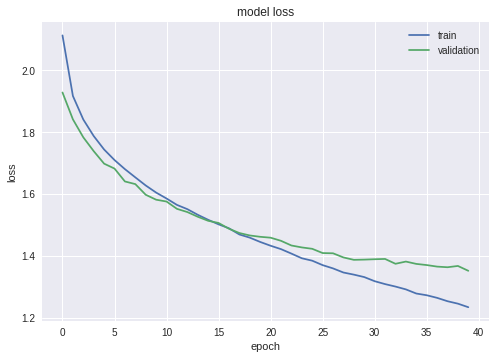

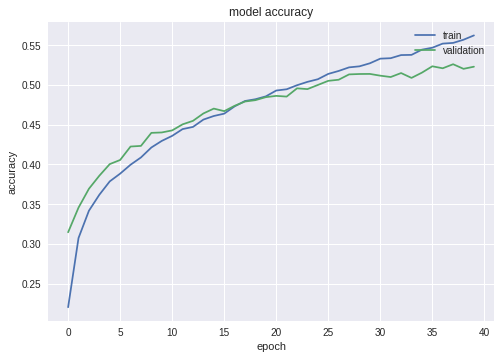

In [0]:
plotLosses(history_10)
plotAcc(history_10)

In [0]:
score9 = model8.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Test loss: 1.3267873455047607
Test accuracy: 0.5323


Observations:
- Model overfits after 30th epoch.
- Relatively high accuracy and low loss compared to previous experiments.

### Comparing test results of all our models

{'Model 1': 0.4667, 'Model 2': 0.4771, 'Model 3': 0.4963, 'Model 4': 0.5189, 'Model 5': 0.559, 'Model 6': 0.4918, 'Model 7': 0.5083, 'Model 8': 0.5084, 'Model 9': 0.5323, 'Model 10': 0.5099, 'Model 11': 0.4337}


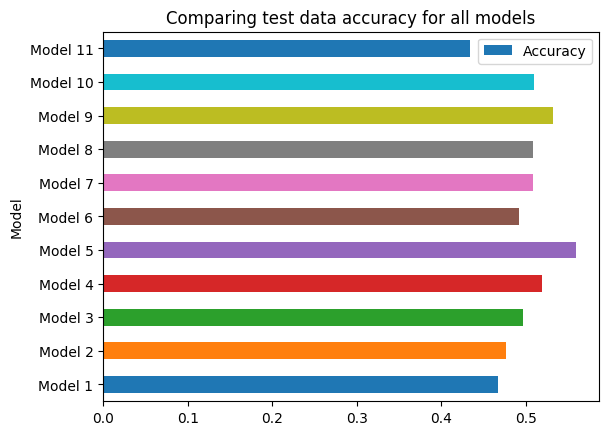

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    
    'Model 1':score1[1],'Model 2':score2[1],'Model 3':score3[1],'Model 4':score4[1],'Model 5':score5[1],'Model 6':score6[1],'Model 7':score7[1],'Model 8':score8[1],'Model 9':score9[1],'Model 10':score10[1],'Model 11':score11[1]
}
print(data)
df = pd.DataFrame(list(data.items()), columns=['Model', 'Accuracy'])
ax = df.plot.barh(x='Model', y='Accuracy',title = "Comparing test data accuracy for all models",legend = 'false')

We will also compare the test data loss on all our models.

{'Model 1': 1.5027718137741088, 'Model 2': 1.4635271297454835, 'Model 3': 1.4153058595657348, 'Model 4': 1.3528676864624023, 'Model 5': 1.2958567558288574, 'Model 6': 1.4385784116744995, 'Model 7': 1.388169965171814, 'Model 8': 1.381894599723816, 'Model 9': 1.3267873455047607, 'Model 10': 1.3840357213974, 'Model 11': 1.6019637374877929}


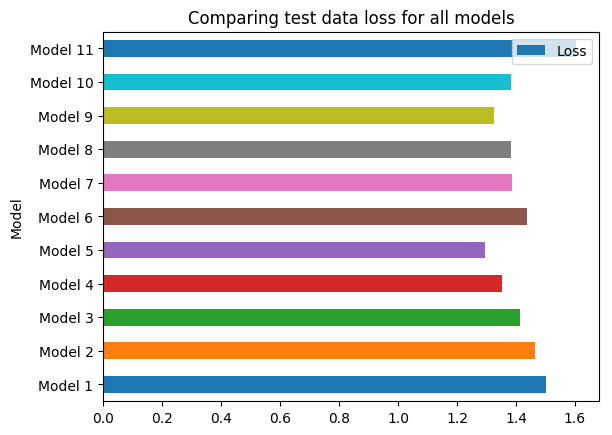

In [0]:
data2 = {
    
    'Model 1':score1[0],'Model 2':score2[0],'Model 3':score3[0],'Model 4':score4[0],'Model 5':score5[0],'Model 6':score6[0],'Model 7':score7[0],'Model 8':score8[0],'Model 9':score9[0],'Model 10':score10[0],'Model 11':score11[0]
}
print(data2)
df = pd.DataFrame(list(data2.items()), columns=['Model', 'Loss'])
ax = df.plot.barh(x='Model', y='Loss',title = "Comparing test data loss for all models",legend = 'false')

We can observe that Model 5 has the highest accuracy and lowest loss, hence making it the most optimal model


## Conclusion

We can hereby conclude that Model 5 has yielded the best results on the CIFAR-10 dataset.

The parameters of this model are as follows:
- Input Layer (1024 neurons, 'ReLu' Activation)
- 2 Hidden Layers ( Layer #1 = 1024 neurons, 'ReLu' Activation
Layer #2 = 512 neurons, 'ReLu' Activation)
- Dropout rate is 0.2
- Optimization function SGD (with learning rate 0.001)
- Batch Size: 128
- Epochs: 75


## References
- https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
- https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
- https://keras.io/getting-started/sequential-model-guide/
